# Theory

If you have any given population distribution with mean $\mu$ and standard deviation $\sigma$, then the sampling distribution of the average will also have mean $\mu$ and will have standard deviation $\sigma/\sqrt{n}$, where $n$ is the sample size of each sample in the distribution.

# Let's test this out

In [53]:
using PyPlot
using StatsKit
using StatsPlots

In [199]:
function createSampleAverageDistribution(sampleSize,numSamples,original_distribution)
    
    # Let's create a crazy distribution that is super non-normal
    popNum = length(original_distribution); # Number of values in the population

    mu = mean(original_distribution)
    sigma = std(original_distribution)

    println("Population Mean = ",round(mu,digits = 3))
    println("Population STD  = ",round(sigma,digits = 3))
    println("")

    StatsPlots.histogram(original_distribution,bins = 50,
                        label = false,
                        title = "Population Distribution",
                        xlabel = "Value",
                        ylabel = "Number of Counts")
    
    # Now let's do the Central Limit Theorem
    n = sampleSize;
    average_distribution = [];

    for i = 1:numSamples

        sampleIDs = rand(1:popNum,n,1);

        sample = []

        for j = 1:n

            append!(sample,original_distribution[sampleIDs[j]]);

        end

        append!(average_distribution,mean(sample))

    end

    mu_avg = mean(average_distribution)
    sigma_avg = std(average_distribution)
    standardError = sigma/sqrt(n);

    println("Sample Average Mean = ",round(mu_avg,digits = 3))
    println("Sample Average STD  = ",round(sigma_avg,digits = 3))
    println("")
    
    println("Comparison with Central Limit Theorem:")
    println("Sample Average Mean = Population Average Mean, Difference = ",round((mu - mu_avg)/mu * 100,digits = 5),"%")
    println("Sample STD = Population STD / sqrt(Sample Size), Difference = ",round((standardError - sigma_avg)/(standardError * 100),digits = 5),"%")
    
    x = range(minimum(original_distribution), stop = maximum(original_distribution),length = 1000);
    f = 1/(standardError * sqrt(2*pi)) .* exp.(-0.5 .* ((x .- mu)./standardError).^2);
    
    StatsPlots.histogram(average_distribution,bins = 50,
                        label = "Sample Average Distribution",
                        title = "Average (of the Samples) Distribution",
                        xlabel = "Value",
                        ylabel = "Number of Counts (Normalized)", normed = true, legend = :topleft)
    StatsPlots.histogram!(original_distribution, bins = 50,
                            label = "Original Distribution",
                            fillalpha = 0.4, normed = true)
    StatsPlots.plot!(x,f,label = "CLT Prediction", linewidth = 2, color =:red)
    
end

createSampleAverageDistribution (generic function with 2 methods)

Population Mean = 0.946
Population STD  = 0.08

Sample Average Mean = 0.945
Sample Average STD  = 0.026

Comparison with Central Limit Theorem:
Sample Average Mean = Population Average Mean, Difference = 0.09322%
Sample STD = Population STD / sqrt(Sample Size), Difference = -0.00048%


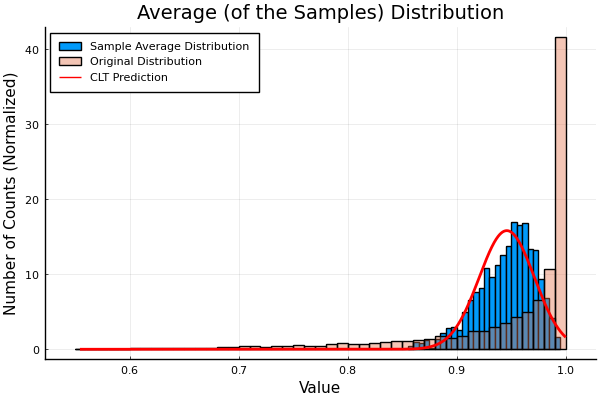

In [202]:
sampleSize = 10;
numSamples = 1000;
popNum = 10000;
originalDistribution =  original_distribution = cos.(rand(popNum) .* rand(popNum))

createSampleAverageDistribution(sampleSize,numSamples,originalDistribution)